딥러닝 파이토치 교과서 p.18~60


---



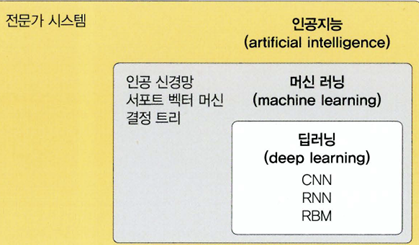

머신러닝은 주어진 데이터를 인간이 먼저 전처리함. 하지만 딥러닝은 인간이 하던 작업을 생략한다. 하지만 훈련시간이 머신러닝보다 길고 대량의 데이터 필요

**머신러닝**이란.. 학습 단계와 예측단계로 나뉨. 훈련 데이터를 알고리즘에 적용해 학습시키고, 이 학습 결과로 모형이 생성된다. 이 모형에 새로운 데이터를 적용해 결과를 예측한다.

cf. 훈련과 검증, 테스트 데이터셋

검증 데이터셋을 사용하는 이유는 모델의 성능을 평가하기 위해서다. 즉 훈련 데이터셋으로 모델을 학습시킨 후 모델이 잘 예측하는지 그 성능을 평가하기 위해서 사용한다. 하지만 검증 데이터셋은 훈련 데이터셋의 일부를 떼어 사용하므로 *학습데이터가 많지 않다면 검증 데이터셋을 사용하는 것은 좋지 않음!*

머신러닝 학습 알고리즘은 지도학습, 비지도 학습, 강화학습이 있다.

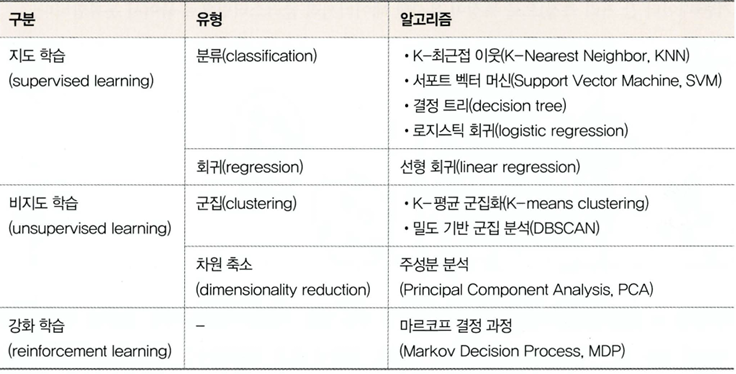

## 딥러닝 학습 과정

데이터 준비 > 모델 정의 > 모델 컴파일(옵티마이저 선택, 손실함수 선택) > 모델 훈련 > 모델 예측

## 딥러닝 학습 알고리즘

지도학습

- 합성곱 신경망(CNN) -> 이미지 분류, 이미지 인식, 이미지 분할
- 순환 신경망: 시계열 데이터를 분류할 때 사용되는 것

비지도 학습

- 워드 임베딩 : 자연어를 컴퓨터가 이해하고 효율적으로 처리하게 하려면 컴퓨터가 이해할 수 있도록 자연어를 적절히 변환하는 것이 필요하다. 이때 워드 임베딩 기술을 이용해서 단어를 벡터로 표현한다.
- 군집: 아무런 정보가 없는 상태에서 데이터를 분류하는 방법이다. 머신러닝과 다르지 않지만 머신러닝에서 군집화를 처리할 때 딥러닝과 함께 사용하면 모델의 성능을 높일 수 있기 때문에 딥러닝과 함께 사용하는 것이 좋다.

전이 학습

- 사전에 학습이 완료된 모델 (사전학습모델)을 가지고 우리가 원하는 학습에 미세 조정 기법을 이용해서 학습시키는 방법이다.

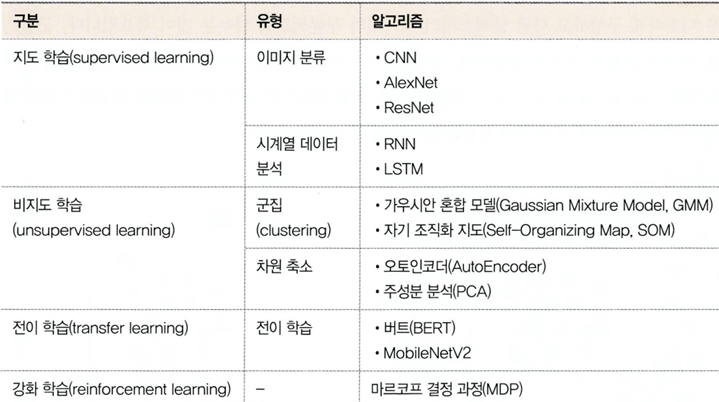



---

## 파이토치 기초 문법

### 2.2.1 텐서 다루기

텐서는 파이토치의 가장 기본이 되는 데이터구조이다. 넘파이의 ndarray와 비슷

In [1]:
# 텐서 생성
import torch
print(torch.tensor([[1,2],[3,4]])) # 2차원 형태의 텐서 생성
print(torch.tensor([[1,2],[3,4]], device = 'cuda:0')) # GPU에 텐서 생성
print(torch.tensor([[1,2],[3,4]], dtype = torch.float64)) # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
# 텐서를 ndarray로 변환
temp = torch.tensor([[1,2], [3,4]])
print(temp.numpy()) # 텐서를 ndarray로 변환

temp = torch.tensor([[1,2],[3,4]], device = 'cuda:0')
print(temp.to('cpu').numpy()) # GPU상의 텐서를 CPU의 텐서로 변환 후 ndarray로 변환

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]


**텐서의 인덱스 조작**

• torch. FloatTensor: 32비트의 부동 소수점

• torch. DoubleTensor: 64비트의 부동 소수점

• torch. LongTensor: 64비트의 부호가 있는 정수

In [3]:
temp = torch.FloatTensor([1,2,3,4,5,6,7]) # 파이토치로 1차원 벡터 생성
print(temp[0], temp[1], temp[-1]) # 인덱스로 접근
print('----------------------')
print(temp[2:5], temp[4:-1]) # 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
----------------------
tensor([3., 4., 5.]) tensor([5., 6.])


**텐서 연산 및 차원 조작**

텐서는 ndarray처럼 다양한 수학 연산 가능, 텐서 간의 타입이 다른 경우는 연산 불가능

In [4]:
v = torch.tensor([1,2,3]) # 길이가 3인 벡터 생성
w = torch.tensor([3,4,6])
print(w-v) #  길이가 같은 벡터 간 뺄셈 연산

tensor([2, 2, 3])


In [5]:
temp = torch.tensor([
    [1,2], [3,4]
])

print(temp.shape)
print('----------')
print(temp.view(4,1)) # 2*2행렬을 4*1로 변형
print('----------')
print(temp.view(-1)) # 2*2행렬을 1차원 벡터로 변형
print('----------')
# -1은 ?와 같은 의미로 다른 차원으로부터 해당 값을 유추하겠다는 의미
print(temp.view(1,-1))
print('----------')
print(temp.view(-1,1))

torch.Size([2, 2])
----------
tensor([[1],
        [2],
        [3],
        [4]])
----------
tensor([1, 2, 3, 4])
----------
tensor([[1, 2, 3, 4]])
----------
tensor([[1],
        [2],
        [3],
        [4]])


### 2.2.2 데이터 준비

**단순하게 파일을 불러와서 사용**



```
import pandas as pd
import torch
data = pd.read_csv('파일이름')

x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
```



**커스텀 데이터셋을 만들어서 사용**

딥러닝은 대량의 데이터를 모델 학습에 이용하는데 이를 한 번에 불러와 훈련시키면 시간, 비용 측면에서 비효율적임. 따라서 커스텀 데이터셋을 만들어서 사용 (한번에 부르지 않고 조금씩 나눠 불러서 사용하는 방식)



```
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self) : # 필요한 변수 선언 후 데이터셋의 전처리 진행하는 함수
    def __len__(self) : # 데이터셋의 길이. 즉, 총 샘플의 수를 가져오는 함수
    def __getitem__(self, index) : # 데이터셋에서 특정 데이터를 가져오는 함수
```



아래 예제를 통해 구체적으로 알아보자



```
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data improt DataLoader

class CustomDataset(Dataset):
    def __init(self, csv_file) :
        self.label = pd.read_csv(csv_file_)

    def __len__(self) :
        return len(self.label)

    def __getitem__(self, idx) :
        sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
        lable = torch.tensor(self.label.iloc[idx, 3]).int()
        return sample, label

tensor_dataset = CustomDataset('파일이름')
dataset = DataLoader(tensor_dataset, batch_size = 4, shuffle = True)
```



**파이토치에서 제공하는 데이터셋 사용**

In [6]:
!pip install requests

MNIST 데이터셋 받는 예제


```
import torchvision.transforms as transforms

minst_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(1.0,))
]) # 평균이 0.5, 표준편차가 1.0이 되도록 데이터 분포 조정

from torchvision.datasets import MNIST
import requests
download_root = '다운받을 경로'

train_dataset = MNIST(download_root, transform = mnist_transform, train= True, download = True)
valid_dataset = MNIST(download_root, transform = mnist_transform, train= False, download = True)
test_dataset = MNIST(download_root, transform = mnist_transform, train= False, download = True)
```



### 2.2.3 모델 정의

파이토치에서 모델을 정의하기 위해서는 모듈을 상속한 클래스를 사용한다. 모델과 모듈은 뭐가 다를까?

- 계층: 모듈 또는 모듈을 구성하는 한 개의 계층 ex) 합성곱층, 선형계층
- 모듈: 한 개 이상의 계층이 모여 구성된 것. 모듈이 모여 새로운 모듈을 만들수도 있음
- 모델: 최종적으로 원하는 네트워크로, 한 개의 모듈이 모델이 될 수도 있음

**단순 신경망을 정의하는 방법**

nn.Module을 상속받지 않는 매우 단순한 모델을 만들 때



```
model = nn.Linear(in_features=1 , out_features=1 , bias=True)
```



**nn.Module()을 상속하여 정의하는 방법**

init() : 모델에서 사용될 모듈(nn.Linear, nn.Conv2d), 활성화 함수 등을 정의

forward() : 모델에서 실행되야하는 연산 정의



```
class MLP(Module) :
    def __init__(self, inputs) :
        super(MLP, self).__init__()
        self.layer = Linear(inputs, 1) # 계층 정의
        self.activation = Sigmoid() # 활성화 함수 정의

    def forward(self, X) :
        X = self.layer(X)
        X = self..activation(X)
        return X
```



**Sequential 신경망을 정의하는 방법**

forward() 함수를 모델에서 실행되어야 할 계산을 좀 더 가독성이 뛰어나게 코드로 작성할 수 있음



```
import torch.nn as nn
class MLP(nn.Module) :
    super(MLP, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2))

    self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 5),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(2))

    def forward(self, x) :
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

model = MLP() # 모델에 대한 객체 생성

print('Printing children', list(model.children()))
print('Printing Modules', list(model.modules()))
```



**함수로 신경망을 정의하는 방법**

Sequential을 이용하는 것과 동일하지만 함수로 선언할 경우 변수에 저장해 둔 계층들을 재사용할 수 있음

모델이 복잡해지는 단점 존재



```
def MLP(in_features = 1, hidden_features = 20, out_features = 1) :
    hidden = nn.Linear(in_features = in_features, out_features = hidden_features, bias = True)
    net = nn.Sequential(hidden, activation, output)
    return net
```



### 2.2.4 모델의 파라미터 정의

- **손실함수(loss function)** : 학습하는 동안 출력과 실제 값 사이 오차를 측정한다. ex) BCELoss (이진분류), CrossEntropyLoss (다중클래스 분류를 위해 사용), MSELoss(회귀 모델에서 사용)

- **옵티마이저(optimizer)**: 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정한다.
> 옵티마이저의 주요 특성
- step() 메서드를 통해 전달받은 파라미터를 업데이트 한다.
- 모델 파라미터 별로 다른 기준(ex. 학습률)을 적용시킬 수 있다.
- **torch.optim.Optimizer(params, defaults)**는 모든 옵티마이저의 기본이 되는 클래스임.
- **zero_grad()** 메서드는 옵티마이저에 사용된 파라미터들의 기울기를 0으로 만듦.
- **torch.optim.lr_scheduler**는 에포크에 따라 학습률을 조절할 수 있음.

- 학습률 스케줄러(learning_rate scheduler): 미리 지정한 횟수의 에포크를 지날 때마다 학습률을 감소시켜준다. 학습률 스케줄러를 사용하면 학습 초기에는 빠른 학습을 진행하다 전역 최소점 (global minimum) 근처에 다다르면 학습률을 줄여서 최적점을 찾아갈 수 있도록 해줌.
> 학습률 스케줄러의 종류

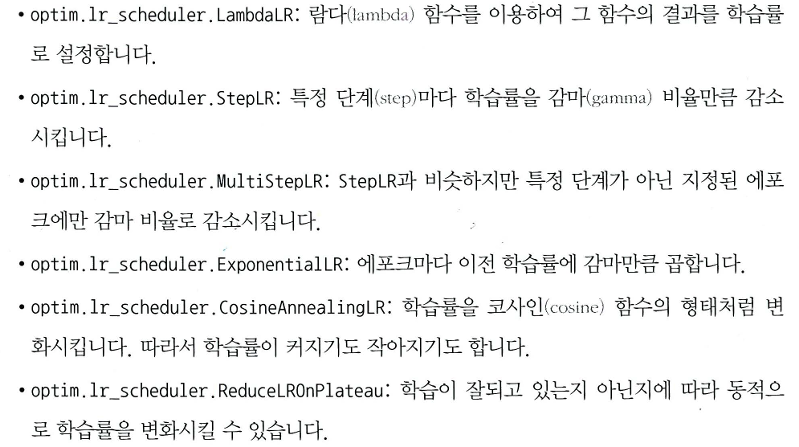

모델의 파라미터를 정의하는 예시 코드



```
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
shceduler = torch.optim.lr_scheduler.LambdaLR(optimizer = optimizer, lr_lambda = lambda epoch : 0.95**epoch)
for epoch in range(1, 100+1) :
    for x,y in dataloader :
        optimizer.zero_grad()
loss_fn(model(x),y).backward()
optimizer.step()
scheduler.step()
```



### 2.2.5 모델 훈련

학습을 시킨다는 것은 y=wx+b라는 함수에서 적절한 w, b 값을 찾는다는 의미임. w와 b에 임의의 값을 적용하기 시작하며 오차가 줄어들어 전역 최소점에 이를 때까지 파라미터 (w,b)를 계속 수정한다.

[구체적인 훈련방법]

 optimizer.zero_grad() 메서드를 이용해서 기울기를 초기화하는 것. 파이토치는 기울기값을 계산하기 위해 loss.backward() 메서드를 사용하는데, 이는 기울기값이 누적된다. RNN 모델을 구현할 때 빼고는 불필요하므로, 기울기값의 누적을 없애기 위해 optimizer.zero_grad() 메서드로 미분값(기울기 구하는 과정에서 미분 이용)을 초기화



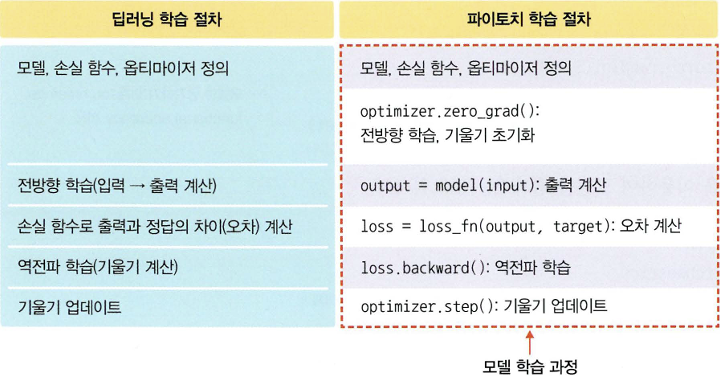

모델을 훈련시키는 예시코드



```
for epoch in range(100):
  yhat = mode1(x_train)
  loss = criterion(yhat, y_train)
  optimizer. zero_grad () #  오차가 중첩적으로 쌓이지 않도록 초기화
  loss.backward()
  optimizer.step()
```



### 2.2.6 모델 평가

In [7]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

함수를 이용해서 모델을 평가하는 코드



```
import torch
import torchmetrics

preds = torch.randn(10,5).softmax(dim = 1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)
```



모듈을 이용헤서 모델 평가하기



```
import torch
import torchmetrics
metric = torchmetrics.Accuracy() # 모델 평가(정확도) 초기화

n_batches = 10
for i in range(n_batches) :
    preds = torch.randn(10, 5).softmax(dim = -1)
    target = torch.randint(5, (10,))

    acc = metrics(preds, target)
    print(f'Accuracy on batch {i}:{acc}') # 현재 배치에서 모델 평가(정확도)

acc = metric.compute()
print(f'Accuracy on alll data :{acc}') # 모든 배치에서 모델 평가(정확도)
```



### 2.2.7 훈련 과정 모니터링

파이토치로 머신러닝/딥러닝 모델을 만들어 학습하면 학습 진행 과정에서 각 파라미터 값이 어떻게 변화하는지 모니터링 어려움

-> 텐서보드를 이용하여 파라미터의 변화를 시각화하여 살펴볼 수 있고 성능을 추적하거나 평가하는 용도로 사용 가능

In [8]:
!pip install tensorboard



```
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('저장 위치')

for epoch in range(num_epochs) :
    model.train()
    batch_loss = 0.0

    for i, (x,y) in enumerate(dataloader) :
        x, y = x.to(device).float(), y.to(device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add_scalar('Loss', loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
```

